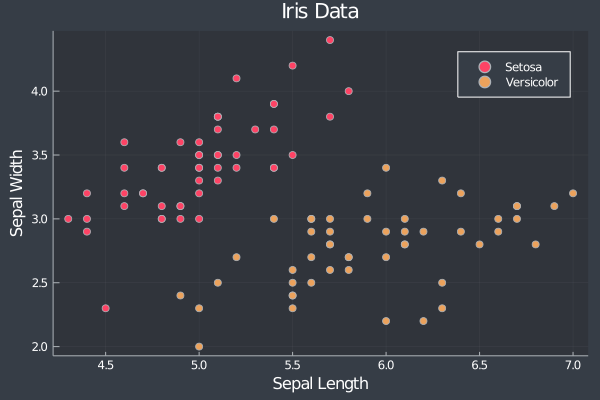

In [1]:
using RDatasets
using Plots
theme(:solarized)

iris = dataset("datasets", "iris")
X_data = [x for x in zip(iris.SepalLength[1:100], iris.SepalWidth[1:100])]
Y_data = [iris.Species[i] == "setosa" ? 1 : -1 for i = 1:100]

scatter(X_data[1:50], 
        label = "Setosa",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        title = "Iris Data")

scatter!(X_data[51:100],
        label = "Versicolor")

In [2]:
# Perceptron Activation Function 
function g(weights, x)
    x_new = [1.0, x[1], x[2]]
    return weights'x_new > 0 ? 1 : -1
end

# Perceptron Update Rule
function perceptron_update(weights, x, y)
    if g(weights, x) != y
        weights += y*[1.0, x[1], x[2]]
    end
    return weights
end

# Error Count
function error(weights, X, Y)
    return sum([Int(g(weights, X[i]) != Y[i]) for i = 1:length(X)])
end;

In [3]:
function perceptron_learning_algorithm(X, Y; epochs = 100000)
    # Assign random weights
    w = randn(3)

    # Save the error measures
    error_points = [(0.0, error(w, X, Y))]
    
    # A simple counter
    i = 1
    
    while error(w, X, Y) > 0 && i < epochs
        # Choose random entries to update (if possible)
        #j = rand(1:100)
        for j = 1:length(X)
            w = perceptron_update(w, X[j], Y[j])
        end
        push!(error_points, (i, error(w, X, Y)))
        i += 1
    end
    return w, error_points
end;

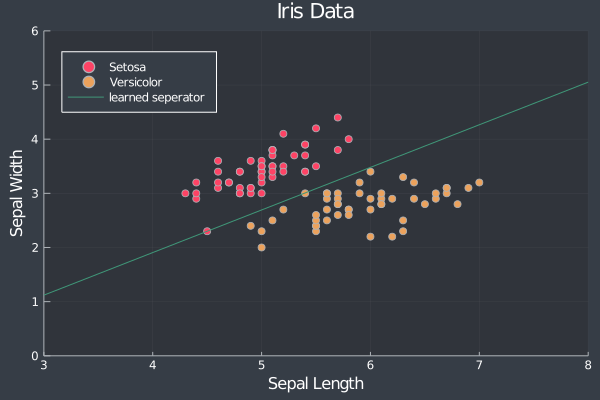

In [4]:
w, error_points = perceptron_learning_algorithm(X_data, Y_data)

# Plot your learned function
plot!(x -> (-w[1]-w[2]*x)/w[3], label = "learned seperator", legend = :topleft, xlims= (3,8), ylims = (0,6))

In [ ]:
plot(error_points, 
    xaxis = "epochs", 
    yaxis = "number of misclassifications",
    legend = false)